## 📌 Project Overview

Credit card approval is a critical decision-making process for financial institutions. This project leverages **machine learning techniques** to build a predictive model that determines whether a credit card application should be **approved or rejected** based on applicant features such as age, income, credit score, and other financial indicators.

The goal of this project is to demonstrate a **complete end-to-end machine learning pipeline**, from raw data to model evaluation.

---

## 🔍 Key Components of the Project

- **Data Preprocessing**
  - Handling missing values
  - Encoding categorical variables
  - Feature scaling and cleaning

- **Exploratory Data Analysis (EDA)**
  - Understanding data distributions
  - Identifying patterns and correlations
  - Visualizing key insights

- **Feature Engineering**
  - Creating and selecting meaningful features
  - Reducing noise and improving model performance

- **Model Training & Tuning**
  - Training multiple machine learning models
  - Hyperparameter optimization

- **Model Evaluation**
  - Performance metrics (Accuracy, Precision, Recall, F1-score, ROC-AUC)
  - Comparison of model results

---

## 🎯 Outcome

The final model provides a reliable and data-driven approach to credit card approval, helping financial institutions reduce risk while improving decision efficiency.


# Import necessary libraries

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
print("All Libraries Imported Successfully")

All Libraries Imported Successfully


## 📂 Loading Dataset

The dataset used in this project is taken from **Kaggle**. It contains two CSV files related to credit card applications and credit history.

### `application_record.csv`
This file includes basic information about credit card applicants such as:
- Age and gender
- Income details
- Employment and education
- Family and housing information

It helps understand **who the applicant is**.

### `credit_record.csv`
This file contains the credit history of applicants, including:
- Monthly repayment status
- Past credit behavior

It helps understand **how the applicant has handled credit in the past**.

### 🔗 Note
Both datasets are connected using a common **ID** column and are merged for analysis and model building.


In [41]:
application_record = pd.read_csv('application_record.csv')
credit_score = pd.read_csv('credit_record.csv')

### EDA on application_record.csv

#### check data shape

shape is property that returns total rows and columns

In [42]:
application_record.shape

(438557, 18)

In [43]:
application_record.sample(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
190651,5873243,F,N,Y,0,157500.0,Working,Higher education,Married,House / apartment,-17231,-1266,1,0,0,0,Sales staff,2
234290,6570930,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20837,365243,1,0,0,0,NaN,1
435173,5350140,F,Y,N,0,360000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-9857,-1548,1,0,1,0,NaN,2
310876,6233782,F,N,Y,0,360000.0,Commercial associate,Higher education,Married,House / apartment,-11581,-3120,1,0,0,1,Managers,2
47716,5145831,F,N,Y,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,-19620,-2196,1,0,0,0,Core staff,2


In [44]:
## count null values

application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [45]:
# statistic analysis

application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [46]:
application_record.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
438552    False
438553    False
438554    False
438555    False
438556    False
Length: 438557, dtype: bool

In [47]:
## data types of columns

application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [48]:
# Step 2.5: Explore numerical columns
numerical_cols = [
    "AMT_INCOME_TOTAL",
    "CNT_CHILDREN",
    "CNT_FAM_MEMBERS",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED"
]

print("\nSummary Statistics for Numerical Columns:")
print(application_record[numerical_cols].describe())


Summary Statistics for Numerical Columns:
       AMT_INCOME_TOTAL   CNT_CHILDREN  CNT_FAM_MEMBERS     DAYS_BIRTH  \
count      4.385570e+05  438557.000000    438557.000000  438557.000000   
mean       1.875243e+05       0.427390         2.194465  -15997.904649   
std        1.100869e+05       0.724882         0.897207    4185.030007   
min        2.610000e+04       0.000000         1.000000  -25201.000000   
25%        1.215000e+05       0.000000         2.000000  -19483.000000   
50%        1.607805e+05       0.000000         2.000000  -15630.000000   
75%        2.250000e+05       1.000000         3.000000  -12514.000000   
max        6.750000e+06      19.000000        20.000000   -7489.000000   

       DAYS_EMPLOYED  
count  438557.000000  
mean    60563.675328  
std    138767.799647  
min    -17531.000000  
25%     -3103.000000  
50%     -1467.000000  
75%      -371.000000  
max    365243.000000  


In [49]:

#Explore categorical columns

categorical_cols = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "OCCUPATION_TYPE"
]

print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(application_record[col].value_counts())


Unique Values in Categorical Columns:

CODE_GENDER:
CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64

FLAG_OWN_CAR:
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64

FLAG_OWN_REALTY:
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64

NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64

NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64

NAME_FAMILY_STATUS:
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: count, dtype: int64

NAME_HOUSING_TYP

### Column Meanings

- **ID** – Unique identifier for each applicant.  
- **CODE_GENDER** – Gender of the applicant (M = Male, F = Female).  
- **FLAG_OWN_CAR** – Whether the applicant owns a car (Y/N).  
- **FLAG_OWN_REALTY** – Whether the applicant owns property (Y/N).  
- **CNT_CHILDREN** – Number of children in the applicant’s family.  
- **AMT_INCOME_TOTAL** – Total annual income of the applicant.  
- **NAME_INCOME_TYPE** – Type of income (e.g., Working, Commercial associate).  
- **NAME_EDUCATION_TYPE** – Highest education level of the applicant.  
- **NAME_FAMILY_STATUS** – Marital status of the applicant.  
- **NAME_HOUSING_TYPE** – Type of housing (apartment, house, etc.).  
- **DAYS_BIRTH** – Age of the applicant in days (negative value means years ago).  
- **DAYS_EMPLOYED** – Days employed in current job (negative value).  
- **FLAG_MOBIL** – Whether the applicant has a mobile phone (1 = Yes, 0 = No).  
- **FLAG_WORK_PHONE** – Whether the applicant has a work phone (1 = Yes, 0 = No).  
- **FLAG_PHONE** – Whether the applicant has a home phone (1 = Yes, 0 = No).  
- **FLAG_EMAIL** – Whether the applicant has an email (1 = Yes, 0 = No).  
- **OCCUPATION_TYPE** – Type of job/occupation (may contain missing values).  
- **CNT_FAM_MEMBERS** – Number of family members in the household.  


In [50]:
credit_score.head()
credit_score.shape

(1048575, 3)

### Column Meanings (`credit_record.csv`)

- **ID** – Unique identifier for each applicant (matches `application_record.csv`).  
- **MONTHS_BALANCE** – Month of the record relative to the current month (0 = most recent, -1 = 1 month ago, etc.).  
- **STATUS** – Credit repayment status for that month:
  - `0` – Paid off that month  
  - `1` – Payment was 30 days late  
  - `2` – Payment was 60 days late  
  - `3` – Payment was 90 days late  
  - `4` – Payment was 120 days late  
  - `5` – Payment was more than 150 days late  
  - `C` – Closed account  
  - `X` – No loan for that month  


# Data Cleaning (Application records)

#### 1. Remove Duplicate Rows

#### Remove duplicate rows


In [51]:
# Remove duplicate rows
application_record = application_record.drop_duplicates()

print("Shape after removing duplicate rows:", application_record.shape)


Shape after removing duplicate rows: (438557, 18)


#### 2.  Handle Missing Values

In [52]:
application_record.isnull().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

OCCUPATION_TYPE has 134203 null values so we will drop it.

In [53]:
application_record = application_record.drop(columns=["OCCUPATION_TYPE"])


#### Fix Age Column (DAYS_BIRTH)

Problem:

Stored as negative days

Solution:

Convert to Age in Years

In [54]:
application_record["AGE_YEARS"] = (-application_record["DAYS_BIRTH"]) / 365
application_record["AGE_YEARS"] = application_record["AGE_YEARS"].astype(int)

# Drop original column
application_record = application_record.drop(columns=["DAYS_BIRTH"])


#### Fix Employment Duration (DAYS_EMPLOYED)
Problem:

Negative values

Some values are unrealistic (positive values mean unemployed)

solution:

Convert to positive years

Replace abnormal values with NaN

In [55]:
application_record["EMPLOYED_YEARS"] = (-application_record["DAYS_EMPLOYED"]) / 365

# Replace negative employment years with NaN
application_record["EMPLOYED_YEARS"] = application_record["EMPLOYED_YEARS"].apply(
    lambda x: x if x >= 0 else np.nan
)

# Drop original column
application_record = application_record.drop(columns=["DAYS_EMPLOYED"])


#### Handle Remaining Missing Values

In [56]:
application_record.isnull().sum()


ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
CNT_FAM_MEMBERS            0
AGE_YEARS                  0
EMPLOYED_YEARS         75329
dtype: int64

In [57]:
application_record = application_record.dropna()

print("Final dataset shape:", application_record.shape)

print (application_record.head())
print (application_record.info())



Final dataset shape: (363228, 17)
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0        Civil marr

### Data Cleaning (credit_record)

In [58]:
credit_score.sample(5)

,ID,MONTHS_BALANCE,STATUS
740261,5104948,-20,C
692804,5094888,-23,X
418894,5050599,-2,0
1041763,5149873,-22,0
568467,5067665,-14,X


#### convert status to numeric

In [59]:
# Mark bad credit
credit_score["BAD_CREDIT"] = credit_score["STATUS"].apply(
    lambda x: 1 if x in ["1", "2", "3", "4", "5"] else 0
)


1 → Bad credit

0 → Good credit

In [60]:
credit_label = credit_score.groupby("ID")["BAD_CREDIT"].max().reset_index()


Rename Target Column

In [61]:
credit_label = credit_label.rename(
    columns={"BAD_CREDIT": "TARGET"}
)


TARGET = 1 → Bad credit (likely rejection)

TARGET = 0 → Good credit (likely approval)

In [62]:
credit_label.head()
credit_label["TARGET"].value_counts()


TARGET
0    40635
1     5350
Name: count, dtype: int64

Now we have 

One row per person

Clean target variable

Ready to merge

#### Merge the Two Datasets

#####  What are we merging?

application_record (cleaned) → features

credit_label → target

We merge using ID.

In [63]:
# Merge application data with credit label
final_df = application_record.merge(credit_label, on="ID", how="inner")

print("Final merged dataset shape:", final_df.shape)


Final merged dataset shape: (30322, 18)


Why inner join?

Keeps only people present in both datasets

Avoids missing target values

Clean and safe

In [64]:
final_df.head()
final_df["TARGET"].value_counts()


TARGET
0    26658
1     3664
Name: count, dtype: int64

# Feature Engineering

Feature engineering means:

Preparing data so machine learning models can understand it.

## Separate Features and Target

In [65]:
X = final_df.drop(columns=["ID", "TARGET"])
y = final_df["TARGET"]


## Identify Column Types

In [66]:
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))


Categorical Columns: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
Numerical Columns: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS', 'EMPLOYED_YEARS']


## Encode Categorical Columns
I used Label Encoding 

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


This converts text like:

Male / Female

Education levels
into numbers.

## Scale Numerical Columns

Scaling helps models treat all numbers fairly.

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)



In [69]:
print(X.head())
print(X.info())


   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            1             1                1             0          427500.0   
1            1             1                1             0          427500.0   
2            1             1                1             0          112500.0   
3            0             0                1             0          270000.0   
4            0             0                1             0          270000.0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 4                    1                   0   
1                 4                    1                   0   
2                 4                    4                   1   
3                 0                    4                   3   
4                 0                    4                   3   

   NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
0                  4           1                1  

# Model Selection and Training (5 models).

## Train–Test Split

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Import Models

We will use simple and common models.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


## Initialize Models

In [72]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


## Train Models & Check Accuracy

In [73]:
from sklearn.metrics import accuracy_score

results = {}

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8793
Decision Tree Accuracy: 0.8780
Random Forest Accuracy: 0.8826
KNN Accuracy: 0.8765
Naive Bayes Accuracy: 0.8694


## Compare Model Performance

In [74]:
results_df = pd.DataFrame(
    results.items(), 
    columns=["Model", "Accuracy"]
).sort_values(by="Accuracy", ascending=False)

results_df


,Model,Accuracy
2,Random Forest,0.882605
0,Logistic Regression,0.879308
1,Decision Tree,0.877988
3,KNN,0.876505
4,Naive Bayes,0.869415


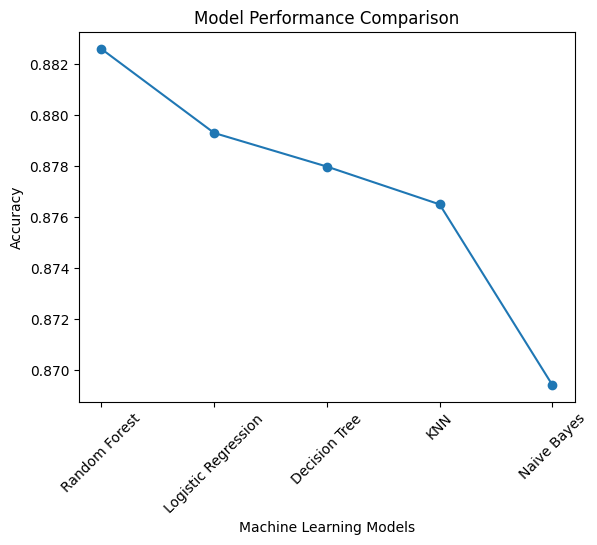

In [75]:
import matplotlib.pyplot as plt

# Ensure correct order (optional but cleaner)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Plot line chart
plt.figure()
plt.plot(results_df["Model"], results_df["Accuracy"], marker='o')

# Titles and labels
plt.title("Model Performance Comparison")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show plot
plt.show()


## Confusion Matrix (Optional but Good)

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)

print("Best Model:", best_model_name)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best Model: Random Forest
[[5140  193]
 [ 519  213]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      5333
           1       0.52      0.29      0.37       732

    accuracy                           0.88      6065
   macro avg       0.72      0.63      0.65      6065
weighted avg       0.86      0.88      0.87      6065



# Save Model & Scaler Using Pickle

In [77]:
import pickle

with open("credit_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [78]:
X.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'AGE_YEARS', 'EMPLOYED_YEARS'],
      dtype='object')